**Fin 585R**  
**Diether**  
**Problem Set**  
**Momentum Portfolios**  

**Overview**

In this problem set you reproduce your second seminal empirical result in academic finance. Specifically, you reproduce and extend (the original sample was about 1963 to 1990) **the momentum effect** of Jegadeesh and Titman (1993) (see "Returns to Buying Winners and Selling Losers: Implications for Stock Market Efficiency"). This empirical result spawned a huge literature in academic finance, and has been a critical core strategy for quant hedge funds (and others) for the last 30 years. You will find out in the next couple of weeks that models like the CAPM can't explain this portfolio return pattern at all. 

Momentum portfolios are formed based on past returns. Specifically, momentum portfolios are most commonly formed based on the cumulative return from months $t-12$ to $t-2$ (you should use this past return window for your portfolios):

$$
r_{i,t-12:t-2} \approx \sum_{x=2}^{12} \log(1+r_{i,t-x})
$$

Note, it's common practice to cumulate (or compound) the returns using the log approximation (as above). You certainly can do the following if you want (well, not for this problem set ... use log returns for the problem set):

$$
r_{i,t-12:t-2} = \left[ \prod_{x=2}^{12} \bigl(1+r_{i,t-x} \bigr) \right]  - 1
$$

The log approximation is traditionally used in this situation because it's less computational intensive. 

The data for this problem set are monthly observations for all stocks on the NYSE, AMEX, and Nasdaq from July of 1962 to  September of 2022. You can download the data directly using the following link: [the data](https://diether.org/prephd/06-mstk_62-22.csv). There is also a link on *Learning Suite*. The data contain the following variables that you will need for the assignment (it also contains som additional variables):

|Variable | Description                                              |
|---------|----------------------------------------------------------|
|permno   | stock identifier                                         |
|caldt    | calendar date                                            |
|ticker   | ticker symbol                                            |
|prc      | stock price (not lagged, contemporaneous with returns)   |
|me       | market equity (not lagged, contemporaneous with returns) |
|ret      | monthly return                                           |
|shr      | shares outstanding in 1000s                              |


**Tasks**

1. Form quintile based equal-weight momentum portfolios and report summary statistics (including a t-test of whether the average return is statistically different from zero for each portfolio). Note, you should exclude low price stocks from your portfolios (price below $5). We will discuss the code for creating the portfolio formation variable in the class before the assignment. <br><br>

2. Compute the average number of stocks that are in each portfolio.<br><br>

3. Add a spread portfolio (long portfolio 4 and short portfolio 0 $\leftarrow$ it's a zero cost L/S portfolio) to your dataframe of equal-weight momentum portfolios and then compute the summary statistics.<br><br>

4. Form quintile based value-weight momentum portfolios and report summary statistics (including a t-test of whether the average return is statistically different from zero for each portfolio). You should once again have five portfolios (note, the only difference between your equal-weight and value-weight portfolios will be the weights). Note, a value weight portfolio is defined as the following ($me$ refers to the marke value of equity): <br><br>
$$
r_{pt} = \sum_{i=1}^{n} \omega_{i}r_{it} = \sum_{i=1}^{n} \left(\frac{me_{i,t-1}}{\sum_{j=1}^{n} me_{j,t-1}} \right) r_{it}
$$<br><br>
Hint: think about splitting the formula into the following parts delineated by the parentheses:<br><br>
\begin{align*}
r_{pt} &= \left( \frac{1}{\sum_{j=1}^{n} me_{j,t-1}} \right) \left( \sum_{i=1}^{n} me_{i,t-1} r_{it}
          \right)
 \end{align*}<br><br>
And then compute each part as a separate groupby. Finally, just multiple the resulting dataframes together and you will have computed the value-weight portfolio returns. <br><br>

In [1]:
import pandas as pd
import numpy as np
from finance_byu.summarize import summary
import matplotlib.pyplot as plt

In [13]:
plt.rcParams['figure.dpi'] = 140
plt.style.use('ggplot')

**Momentum portfolio construction**  

1. Data Preparation.<br><br>

2. Create portfolio formation variable.<br><br>

3. Bin the data<br><br>

4. Create the portfolios based on bins and weights scheme.<br><br>

In [3]:
df = pd.read_csv('../data/06-mstk_62-22.csv', parse_dates=['caldt'])
df

,permno,caldt,ticker,prc,me,ret,shr
0,10000,1986-01-31,OMFGA,4.37500,16.1000,NaN,3680.0
1,10000,1986-02-28,OMFGA,3.25000,11.9600,-0.257143,3680.0
2,10000,1986-03-31,OMFGA,4.43750,16.3300,0.365385,3680.0
3,10000,1986-04-30,OMFGA,4.00000,15.1720,-0.098592,3793.0
4,10000,1986-05-30,OMFGA,3.10938,11.7939,-0.222656,3793.0
...,...,...,...,...,...,...,...
3384890,93436,2022-05-31,TSLA,758.26000,785565.0000,-0.129197,1036010.0
3384891,93436,2022-06-30,TSLA,673.42000,701030.0000,-0.111888,1041000.0
3384892,93436,2022-07-29,TSLA,891.45000,931111.0000,0.323765,1044490.0
3384893,93436,2022-08-31,TSLA,275.61000,863616.0000,-0.072489,3133470.0


**Cumulative rolling past returns**

1. Create log returns.<br><br>

2. Create 12 period cumulative log return windows: t-11 to t-0<br><br>

3. Lag/shift two periods<br><br>

In [4]:
df['logret'] = np.log(1 + df['ret'])
df['mom'] = df.groupby('permno')['logret'].rolling(11).sum().reset_index(drop=True)
df['mom'] = df.groupby('permno')['mom'].shift(2)
df.head(15)

,permno,caldt,ticker,prc,me,ret,shr,logret,mom
0,10000,1986-01-31,OMFGA,4.375000,16.10000,NaN,3680.0,NaN,NaN
1,10000,1986-02-28,OMFGA,3.250000,11.96000,-0.257143,3680.0,-0.297252,NaN
2,10000,1986-03-31,OMFGA,4.437500,16.33000,0.365385,3680.0,0.311436,NaN
3,10000,1986-04-30,OMFGA,4.000000,15.17200,-0.098592,3793.0,-0.103797,NaN
4,10000,1986-05-30,OMFGA,3.109380,11.79390,-0.222656,3793.0,-0.251872,NaN
5,10000,1986-06-30,OMFGA,3.093750,11.73460,-0.005025,3793.0,-0.005038,NaN
6,10000,1986-07-31,OMFGA,2.843750,10.78630,-0.080808,3793.0,-0.084260,NaN
7,10000,1986-08-29,OMFGA,1.093750,4.14859,-0.615385,3793.0,-0.955512,NaN
8,10000,1986-09-30,OMFGA,1.031250,3.91153,-0.057143,3793.0,-0.058841,NaN
9,10000,1986-10-31,OMFGA,0.781250,3.00234,-0.242424,3843.0,-0.277631,NaN


**Lag Variables Before Removing Any Observations**

+ Need to remove missing `mom` observations before binning.<br><br>

+ So lag price and market-cap before you do that.<br><br>

+ I'll remove low priced stock at the same time.<br><br>

+ Remember, you must always impose this restriction using lagged price. Otherwise, you will create a look ahead bias in your portfolio formation.<br><br>

In [5]:
df['prclag'] = df.groupby('permno')['prc'].shift()
df['melag'] = df.groupby('permno')['me'].shift()

df = df.query("mom == mom and prclag >= 5").reset_index(drop=True)    # where mom is not NaN and price > 5
df.head(10)

,permno,caldt,ticker,prc,me,ret,shr,logret,mom,prclag,melag
0,10001,1987-02-27,GFGC,6.2500,6.19375,-0.074074,991.0,-0.076961,0.196691,6.7500,6.68925
1,10001,1987-03-31,GFGC,6.3750,6.31763,0.036800,991.0,0.036139,0.140121,6.2500,6.19375
2,10001,1987-04-30,GFGC,6.1250,6.06987,-0.039216,991.0,-0.040005,0.038272,6.3750,6.31763
3,10001,1987-05-29,GFGC,5.6875,5.63631,-0.071429,991.0,-0.074108,0.064559,6.1250,6.06987
4,10001,1987-06-30,GFGC,5.8750,5.82212,0.051429,991.0,0.050150,0.034406,5.6875,5.63631
5,10001,1987-07-31,GFGC,6.0000,5.94600,0.021277,991.0,0.021053,-0.026547,5.8750,5.82212
6,10001,1987-08-31,GFGC,6.5000,6.44150,0.083333,991.0,0.080043,0.033860,6.0000,5.94600
7,10001,1987-09-30,GFGC,6.2500,6.20000,-0.022308,992.0,-0.022560,-0.014767,6.5000,6.44150
8,10001,1987-10-30,GFGC,6.3750,6.32400,0.020000,992.0,0.019803,0.068358,6.2500,6.20000
9,10001,1987-11-30,GFGC,6.1875,6.13800,-0.029412,992.0,-0.029853,0.007331,6.3750,6.32400


**Bin the Data/Create Portfolio Breakpoints**

+ For the short selling loan fee portfolios we used cut to create bins.<br><br>

+ Here we want to create bins based on the quintiles of the `mom` variable so we use `qcut`.<br><br>

+ `qcut` also must be done with a groupby; the quintiles will have different breakpoints ever month.<br><br>

+ Specifically we use `groupby` and transform to call `qcut` every month and transform the `mom` variable into bins.<br><br>

+ Use transform when you're mapping a Nx1 variable (mom) into and new Nx1 variable (bins).<br><br>

In [6]:
df['bins'] = df.groupby('caldt')['mom'].transform(pd.qcut, 5, labels=False)
df

,permno,caldt,ticker,prc,me,ret,shr,logret,mom,prclag,melag,bins
0,10001,1987-02-27,GFGC,6.2500,6.19375,-0.074074,991.0,-0.076961,0.196691,6.7500,6.68925,3
1,10001,1987-03-31,GFGC,6.3750,6.31763,0.036800,991.0,0.036139,0.140121,6.2500,6.19375,2
2,10001,1987-04-30,GFGC,6.1250,6.06987,-0.039216,991.0,-0.040005,0.038272,6.3750,6.31763,1
3,10001,1987-05-29,GFGC,5.6875,5.63631,-0.071429,991.0,-0.074108,0.064559,6.1250,6.06987,2
4,10001,1987-06-30,GFGC,5.8750,5.82212,0.051429,991.0,0.050150,0.034406,5.6875,5.63631,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2215018,93436,2022-05-31,TSLA,758.2600,785565.00000,-0.129197,1036010.0,-0.138340,0.418017,870.7600,902116.00000,4
2215019,93436,2022-06-30,TSLA,673.4200,701030.00000,-0.111888,1041000.0,-0.118657,0.331264,758.2600,785565.00000,4
2215020,93436,2022-07-29,TSLA,891.4500,931111.00000,0.323765,1044490.0,0.280480,0.109376,673.4200,701030.00000,4
2215021,93436,2022-08-31,TSLA,275.6100,863616.00000,-0.072489,3133470.0,-0.075250,-0.020255,891.4500,931111.00000,3


## 1.
Form quintile based equal-weight momentum portfolios and report summary statistics (including a t-test of whether the average return is statistically different from zero for each portfolio). Note, you should exclude low price stocks from your portfolios (price below $5). We will discuss the code for creating the portfolio formation variable in the class before the assignment.

In [7]:
port = df.groupby(['caldt','bins'])['ret'].mean()*100
port = port.unstack(level='bins')
summary(port).round(2)

bins,0,1,2,3,4
count,711.00,711.00,711.00,711.00,711.00
mean,0.41,0.95,1.14,1.31,1.62
std,6.77,5.14,4.69,4.83,6.32
tstat,1.61,4.93,6.47,7.22,6.83
pval,0.11,0.00,0.00,0.00,0.00
min,-27.94,-23.77,-25.29,-28.54,-31.34
25%,-3.12,-1.62,-1.30,-1.29,-1.61
50%,0.60,1.28,1.63,1.75,2.04
75%,3.97,3.70,3.89,4.38,5.42
max,31.71,23.75,20.51,18.01,31.63


## 2.
Compute the average number of stocks that are in each portfolio.

In [21]:
count = df.groupby(['caldt','bins'])['permno'].count()
count = count.unstack(level='bins')
count

bins,0,1,2,3,4
caldt,,,,,
1963-07-31,214,213,213,213,214
1963-08-30,316,315,315,315,315
1963-09-30,318,318,318,318,318
1963-10-31,317,316,317,316,317
1963-11-29,317,317,316,317,317
...,...,...,...,...,...
2022-05-31,579,579,579,579,579
2022-06-30,581,580,580,580,581
2022-07-29,568,567,567,567,567


In [22]:
count.mean()

bins
0    623.461322
1    622.880450
2    622.873418
3    622.880450
4    623.267229
dtype: float64

## 3.
Add a spread portfolio (long portfolio 4 and short portfolio 0 $\leftarrow$ it's a zero cost L/S portfolio) to your dataframe of equal-weight momentum portfolios and then compute the summary statistics.

In [9]:
port['spread'] = port[4] - port[0]
port

bins,0,1,2,3,4,spread
caldt,,,,,,
1963-07-31,-1.695985,-1.160239,-0.576725,-0.963438,-0.385561,1.310424
1963-08-30,2.669885,4.176108,4.073168,4.495509,6.661783,3.991898
1963-09-30,-1.897316,-1.131404,-0.919125,-1.434696,-1.589049,0.308267
1963-10-31,0.637494,0.141423,1.247936,1.974894,3.348750,2.711256
1963-11-29,-1.649832,-0.897364,-1.309410,-0.823855,-1.455917,0.193915
...,...,...,...,...,...,...
2022-05-31,-4.304742,0.387874,0.236442,-0.072596,1.478932,5.783675
2022-06-30,-7.009121,-9.057559,-6.765649,-4.410962,-9.639752,-2.630630
2022-07-29,11.672456,9.356767,8.751010,5.873007,8.340745,-3.331711


In [10]:
summary(port).round(2)

bins,0,1,2,3,4,spread
count,711.00,711.00,711.00,711.00,711.00,711.00
mean,0.41,0.95,1.14,1.31,1.62,1.21
std,6.77,5.14,4.69,4.83,6.32,4.55
tstat,1.61,4.93,6.47,7.22,6.83,7.09
pval,0.11,0.00,0.00,0.00,0.00,0.00
min,-27.94,-23.77,-25.29,-28.54,-31.34,-27.12
25%,-3.12,-1.62,-1.30,-1.29,-1.61,-0.66
50%,0.60,1.28,1.63,1.75,2.04,1.47
75%,3.97,3.70,3.89,4.38,5.42,3.35
max,31.71,23.75,20.51,18.01,31.63,29.49


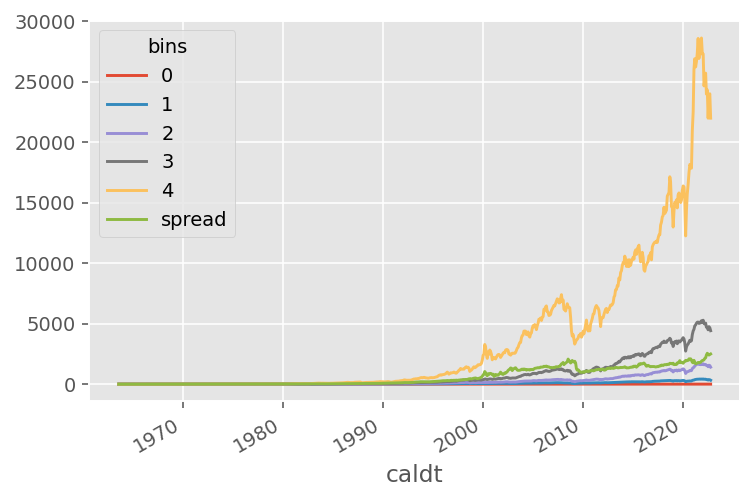

In [14]:
(1 + port/100).cumprod().plot()
plt.show()

## 4.
Form quintile based value-weight momentum portfolios and report summary statistics (including a t-test of whether the average return is statistically different from zero for each portfolio). You should once again have five portfolios (note, the only difference between your equal-weight and value-weight portfolios will be the weights). Note, a value weight portfolio is defined as the following ($me$ refers to the marke value of equity): <br><br>
$$
r_{pt} = \sum_{i=1}^{n} \omega_{i}r_{it} = \sum_{i=1}^{n} \left(\frac{me_{i,t-1}}{\sum_{j=1}^{n} me_{j,t-1}} \right) r_{it}
$$<br><br>
Hint: think about splitting the formula into the following parts delineated by the parentheses:<br><br>
\begin{align*}
r_{pt} &= \left( \frac{1}{\sum_{j=1}^{n} me_{j,t-1}} \right) \left( \sum_{i=1}^{n} me_{i,t-1} r_{it}
          \right)
 \end{align*}<br><br>
And then compute each part as a separate groupby. Finally, just multiple the resulting dataframes together and you will have computed the value-weight portfolio returns. <br><br>

In [15]:
df['me_ret'] = df['melag']*df['ret']
df

,permno,caldt,ticker,prc,me,ret,shr,logret,mom,prclag,melag,bins,me_ret
0,10001,1987-02-27,GFGC,6.2500,6.19375,-0.074074,991.0,-0.076961,0.196691,6.7500,6.68925,3,-0.495500
1,10001,1987-03-31,GFGC,6.3750,6.31763,0.036800,991.0,0.036139,0.140121,6.2500,6.19375,2,0.227930
2,10001,1987-04-30,GFGC,6.1250,6.06987,-0.039216,991.0,-0.040005,0.038272,6.3750,6.31763,1,-0.247750
3,10001,1987-05-29,GFGC,5.6875,5.63631,-0.071429,991.0,-0.074108,0.064559,6.1250,6.06987,2,-0.433562
4,10001,1987-06-30,GFGC,5.8750,5.82212,0.051429,991.0,0.050150,0.034406,5.6875,5.63631,2,0.289868
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215018,93436,2022-05-31,TSLA,758.2600,785565.00000,-0.129197,1036010.0,-0.138340,0.418017,870.7600,902116.00000,4,-116550.680852
2215019,93436,2022-06-30,TSLA,673.4200,701030.00000,-0.111888,1041000.0,-0.118657,0.331264,758.2600,785565.00000,4,-87895.296720
2215020,93436,2022-07-29,TSLA,891.4500,931111.00000,0.323765,1044490.0,0.280480,0.109376,673.4200,701030.00000,4,226968.977950
2215021,93436,2022-08-31,TSLA,275.6100,863616.00000,-0.072489,3133470.0,-0.075250,-0.020255,891.4500,931111.00000,3,-67495.025946


In [16]:
tot_me = df.groupby(['caldt', 'bins'])['melag'].agg(weight='sum').reset_index()
tot_me['weight'] = 1 / tot_me['weight']
tot_me

,caldt,bins,weight
0,1963-07-31,0,3.733104e-05
1,1963-07-31,1,1.384998e-05
2,1963-07-31,2,1.274210e-05
3,1963-07-31,3,8.925594e-06
4,1963-07-31,4,1.419358e-05
...,...,...,...
3550,2022-09-30,0,3.350905e-07
3551,2022-09-30,1,1.158110e-07
3552,2022-09-30,2,1.056604e-07
3553,2022-09-30,3,1.168770e-07


In [17]:
df = pd.merge(df, tot_me, on=['caldt', 'bins'])
df

,permno,caldt,ticker,prc,me,ret,shr,logret,mom,prclag,melag,bins,me_ret,weight
0,10001,1987-02-27,GFGC,6.250,6.19375,-0.074074,991.0,-0.076961,0.196691,6.750,6.68925,3,-0.495500,0.000001
1,10020,1987-02-27,KEYC,37.500,217.50000,0.048951,5800.0,0.047791,0.232228,35.750,207.35000,3,10.149990,0.000001
2,10225,1987-02-27,AMB,50.500,5547.58000,0.020202,109853.0,0.020001,0.265732,49.500,5437.72000,3,109.852819,0.000001
3,10241,1987-02-27,AC,103.000,2809.74000,0.084210,27279.0,0.080852,0.272054,95.000,2591.51000,3,218.232353,0.000001
4,10401,1987-02-27,T,22.500,24119.70000,-0.090909,1071990.0,-0.095310,0.206905,24.750,26531.70000,3,-2411.972968,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215018,55589,1973-11-30,DJI,4.750,4.17050,-0.296296,878.0,-0.351397,-0.825320,6.750,5.92650,0,-1.755998,0.000043
2215019,55642,1973-11-30,OMT,10.625,23.49190,-0.303279,2211.0,-0.361370,-0.466744,15.250,33.71780,0,-10.225901,0.000043
2215020,55650,1973-11-30,HMN,NaN,NaN,NaN,1430.0,NaN,-0.616774,12.375,17.69620,0,NaN,0.000043
2215021,55706,1973-11-30,HZN,7.375,32.95150,-0.106061,4468.0,-0.112118,-0.418370,8.250,36.86100,0,-3.909515,0.000043


In [18]:
df['vw_ret'] = df['me_ret']*df['weight']
df

,permno,caldt,ticker,prc,me,ret,shr,logret,mom,prclag,melag,bins,me_ret,weight,vw_ret
0,10001,1987-02-27,GFGC,6.250,6.19375,-0.074074,991.0,-0.076961,0.196691,6.750,6.68925,3,-0.495500,0.000001,-5.912170e-07
1,10020,1987-02-27,KEYC,37.500,217.50000,0.048951,5800.0,0.047791,0.232228,35.750,207.35000,3,10.149990,0.000001,1.211069e-05
2,10225,1987-02-27,AMB,50.500,5547.58000,0.020202,109853.0,0.020001,0.265732,49.500,5437.72000,3,109.852819,0.000001,1.310733e-04
3,10241,1987-02-27,AC,103.000,2809.74000,0.084210,27279.0,0.080852,0.272054,95.000,2591.51000,3,218.232353,0.000001,2.603888e-04
4,10401,1987-02-27,T,22.500,24119.70000,-0.090909,1071990.0,-0.095310,0.206905,24.750,26531.70000,3,-2411.972968,0.000001,-2.877899e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215018,55589,1973-11-30,DJI,4.750,4.17050,-0.296296,878.0,-0.351397,-0.825320,6.750,5.92650,0,-1.755998,0.000043,-7.501331e-05
2215019,55642,1973-11-30,OMT,10.625,23.49190,-0.303279,2211.0,-0.361370,-0.466744,15.250,33.71780,0,-10.225901,0.000043,-4.368334e-04
2215020,55650,1973-11-30,HMN,NaN,NaN,NaN,1430.0,NaN,-0.616774,12.375,17.69620,0,NaN,0.000043,NaN
2215021,55706,1973-11-30,HZN,7.375,32.95150,-0.106061,4468.0,-0.112118,-0.418370,8.250,36.86100,0,-3.909515,0.000043,-1.670079e-04


In [19]:
vw_port = df.groupby(['caldt','bins'])['vw_ret'].sum()*100
vw_port = vw_port.unstack(level='bins')
summary(vw_port).round(2)

bins,0,1,2,3,4
count,711.00,711.00,711.00,711.00,711.00
mean,0.43,0.82,0.85,1.02,1.32
std,6.62,4.84,4.35,4.46,5.71
tstat,1.72,4.49,5.24,6.08,6.17
pval,0.09,0.00,0.00,0.00,0.00
min,-25.43,-20.97,-20.64,-22.35,-26.51
25%,-3.07,-1.76,-1.61,-1.59,-1.89
50%,0.37,1.04,1.04,1.31,1.67
75%,3.93,3.47,3.60,3.78,4.81
max,29.15,17.90,13.88,18.64,24.75


In [23]:
vw_port['spread'] = vw_port[4] - vw_port[0]
summary(vw_port).round(2)

bins,0,1,2,3,4,spread
count,711.00,711.00,711.00,711.00,711.00,711.00
mean,0.43,0.82,0.85,1.02,1.32,0.89
std,6.62,4.84,4.35,4.46,5.71,5.64
tstat,1.72,4.49,5.24,6.08,6.17,4.23
pval,0.09,0.00,0.00,0.00,0.00,0.00
min,-25.43,-20.97,-20.64,-22.35,-26.51,-31.62
25%,-3.07,-1.76,-1.61,-1.59,-1.89,-1.73
50%,0.37,1.04,1.04,1.31,1.67,1.26
75%,3.93,3.47,3.60,3.78,4.81,3.93
max,29.15,17.90,13.88,18.64,24.75,31.98


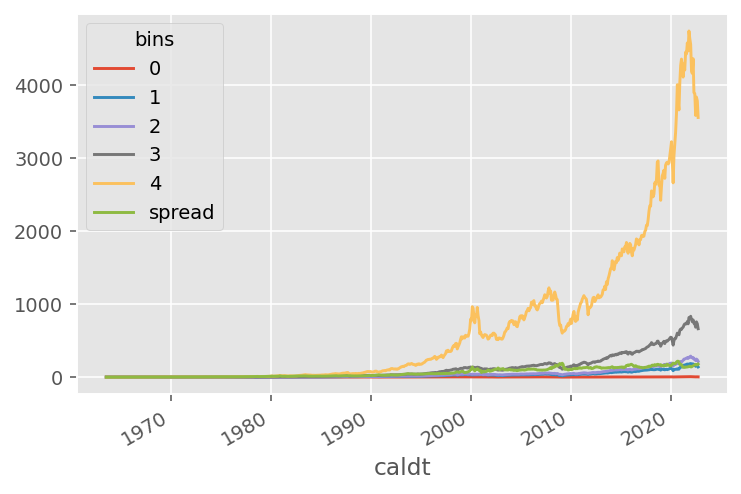

In [24]:
(1 + vw_port/100).cumprod().plot()
plt.show()